In [74]:
import pandas as pd

df = pd.read_csv('./AI/서적_알고리즘_총지수_전체.csv')
df.drop(columns="Unnamed: 0", inplace=True)
df["날짜"] = df["날짜"].astype(str)
df.columns = df.columns.str.replace('_','')
# 날짜 데이터타임 변환 후 인덱스 변환
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y-%m')
df["날짜"] = df["날짜"].dt.strftime('%Y%m')
df.set_index('날짜', inplace=True)
df.head()

,서적/문구,소비자물가지수등락률,소매판매지수증감률,동월평균등락률,전체평균대비,소비
날짜,,,,,,
201001,-14.5,0.007900,-0.095082,-9.446154,0,0
201002,-6.2,0.002015,-0.016908,-7.723077,1,0
201003,54.4,0.002023,0.054054,40.161538,1,1
201004,-30.9,0.004026,-0.018648,-23.476923,0,0
201005,-5.8,0.001011,0.042755,-1.708333,1,1


In [75]:
data = df[["서적/문구", "소비자물가지수등락률", "소매판매지수증감률","동월평균등락률","전체평균대비"]]
target = df["소비"]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 201001 to 202204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   서적/문구       148 non-null    float64
 1   소비자물가지수등락률  148 non-null    float64
 2   소매판매지수증감률   148 non-null    float64
 3   동월평균등락률     148 non-null    float64
 4   전체평균대비      148 non-null    int64  
 5   소비          148 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.1+ KB


### 데이터 수동 분리

### 코로나 전, 후 데이터 분리

In [77]:
X_train = data[:134] 
X_test = data[135:] 
y_train = target[:134] 
y_test = target[135:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
        서적/문구  소비자물가지수등락률  소매판매지수증감률    동월평균등락률  전체평균대비
날짜                                                     
202104  -19.6    0.001375  -0.005021 -23.476923       0
202105    4.5    0.000686   0.032801  -1.708333       1
202106   -7.8    0.000000  -0.026873  -4.941667       1
202107    9.1    0.002058   0.005858  11.325000       0
202108   -5.3    0.004792  -0.030782  -6.008333       1
202109    4.8    0.004088   0.053219   3.391667       0
202110   -0.9    0.001745   0.018745  -5.558333       1
202111   -5.4    0.005031  -0.002400   2.250000       0
202112   18.6    0.001637   0.020048  17.291667       1
202201   -5.1    0.006248  -0.076258  -9.446154       0
202202  -16.4    0.005827  -0.081702  -7.723077       1
202203   40.3    0.007217   0.130677  40.161538       1
202204  -19.5    0.007449  -0.021311 -23.476923       0
y 테스트 데이터 :
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [78]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(134, 5), 테스트 세트 Shape:(13, 5)
 학습 세트 레이블 값 분포 비율
0    0.58209
1    0.41791
Name: 소비, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.074627
1    0.022388
Name: 소비, dtype: float64


In [79]:
print('X_train의 Shape:', X_train.shape)
print('y_train의 Shape:', y_train.shape)
print('X_test의 Shape:', X_test.shape)
print('y_train의 Shape:', y_test.shape)

X_train의 Shape: (134, 5)
y_train의 Shape: (134,)
X_test의 Shape: (13, 5)
y_train의 Shape: (13,)


### 코로나 전 후 DecisionTree, RandomForest, LogisticRegression 정확도

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

data = df[["서적/문구", "소비자물가지수등락률", "소매판매지수증감률","동월평균등락률","전체평균대비"]]
target = df["소비"]

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-1)
lr_clf = LogisticRegression()

# LogisticRegression 학습/예측/평가
lr_clf_time = time.time()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_pred)))
print('LogisticRegression 수행 시간: {0:.1f} 초'.format(time.time()-lr_clf_time))

# DecisionTreeClassifier 학습/예측/평가
dt_clf_time = time.time()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('\nDecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, dt_pred)))
print('DecisionTree 수행 시간: {0:.1f} 초'.format(time.time()-dt_clf_time))

# RandomForestClassifier 학습/예측/평가
rf_clf_time = time.time()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('\nRandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, rf_pred)))
print('RandomForest 수행 시간: {0:.1f} 초'.format(time.time()-rf_clf_time))

# 언더피팅인 LogisticRegression은 편향이 적고 분산이 높은 DecisionTreeClassifier 또는 RandomForestClassifier로 극복 가능
# 오버피팅인 DecisionTreeClassifier와 RandomFOrestClassifier는 학습 데이터에서 검증 데이터를 분리해 극복 가능

LogisticRegression 정확도: 0.9231
LogisticRegression roc_auc: 0.950
LogisticRegression 수행 시간: 0.0 초

DecisionTreeClassifier 정확도: 0.9231
DecisionTreeClassifier roc_auc: 0.950
DecisionTree 수행 시간: 0.0 초

RandomForestClassifier 정확도: 0.9231
RandomForestClassifier roc_auc: 0.950
RandomForest 수행 시간: 0.2 초


#### 최적화 작업 전이기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없음.

### KFold
#### 검증 데이터 분리

In [81]:
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(data)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)


교차 검증 0 정확도: 0.8333
교차 검증 1 정확도: 0.9000
교차 검증 2 정확도: 0.9000
교차 검증 3 정확도: 0.8621
교차 검증 4 정확도: 0.8966
평균 정확도: 0.8784


In [82]:
# DecisionTree KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # DecisionTree 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.8333, 학습 데이터 크기: 118, 검증데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
학습 레이블 데이터 분포:
 0    71
1    47
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    13
Name: 소비, dtype: int64

#2 교차 검증 정확도 :0.9, 학습 데이터 크기: 118, 검증데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
학습 레이블 데이터 분포:
 0    73
1    45
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0    15
Name: 소비, dtype: int64

#3 교차 검증 정확도 :0.9, 학습 데이터 크기: 118, 검증데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
학습 레이블 데이터 분포:
 0    69
1    49
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 0    19
1    11
Name: 소비, dtype: int64

#4 교차 검증 정확도 :0.8621, 학습 데이터 크기: 119, 검증데이터 크기: 29
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
학습 레이블 데이터 분포:
 0 

In [83]:
# RandomForest KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # RandomForest 학습 및 예측
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.7667, 학습 데이터 크기: 118, 검증데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
학습 레이블 데이터 분포:
 0    71
1    47
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    13
Name: 소비, dtype: int64

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 118, 검증데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
학습 레이블 데이터 분포:
 0    73
1    45
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0    15
Name: 소비, dtype: int64

#3 교차 검증 정확도 :0.9333, 학습 데이터 크기: 118, 검증데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
학습 레이블 데이터 분포:
 0    69
1    49
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 0    19
1    11
Name: 소비, dtype: int64

#4 교차 검증 정확도 :0.8966, 학습 데이터 크기: 119, 검증데이터 크기: 29
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
학습 레이블 데이터 분

In [84]:
exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.7667
교차 검증 1 정확도: 0.9667
교차 검증 2 정확도: 0.9333
교차 검증 3 정확도: 0.8966
교차 검증 4 정확도: 0.9310
평균 정확도: 0.8989


### StratifiedKFold, cross_val_score()
#### 불균형한 분포도를 가진 레이블 데이터 집합에 사용

In [85]:
df['소비'].value_counts()

0    88
1    60
Name: 소비, dtype: int64

In [86]:
# DecisionTree StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for trian_index, test_index in skfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))



1 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 31]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[26 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 60 61 63 64]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[56 57 58 59 62 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 84
 85 87 89 90 91 93]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#4 검증 세트 인덱스:[ 83  86  88  92  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 111 113 114 115 116 117 120 121 125]

5 교차 검증 정확도 :0.8966, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#5 검증 세트 인덱스:[110 112 118 119 122 123 124 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147]

## 교차 검증별 정확도: [1.     1.     1.     1.     0.8966]
## 평균 검증 정확도: 0.9793200000000001


In [87]:
# RandomForest StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for trian_index, test_index in skfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 31]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[26 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 60 61 63 64]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[56 57 58 59 62 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 84
 85 87 89 90 91 93]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#4 검증 세트 인덱스:[ 83  86  88  92  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 111 113 114 115 116 117 120 121 125]

5 교차 검증 정확도 :0.931, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#5 검증 세트 인덱스:[110 112 118 119 122 123 124 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147]

## 교차 검증별 정확도: [1.    1.    1.    1.    0.931]
## 평균 검증 정확도: 0.9862


In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, data, target, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8333
교차 검증 1 정확도: 0.9333
교차 검증 2 정확도: 0.9333
교차 검증 3 정확도: 0.9655
교차 검증 4 정확도: 0.8966
평균 정확도: 0.9124


### GridSearchCV
#### 교차 검증과 최적 하이퍼 파라미터 한번에 찾기

In [89]:
# DecisionTreeClassifier GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],\
            'min_samples_split':[2, 3, 5],\
            'min_samples_leaf':[1, 5, 8]}

def best_dtparam(clf, param, scoring_name, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
    
best_dtparam(dt_clf, parameters, 'accuracy', 5)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.8909
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.9310


In [90]:
# 최적 하이퍼 파라미터 적용
dt_clf1 = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=11)
dt_clf1.fit(X_train, y_train)
dt1_pred = dt_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9310


In [91]:
# RandomForestClassifier GridSearchCV

parameters = {\
        'n_estimators':[100],\
        'max_depth' : [6, 8, 10, 12],\
        'min_samples_leaf' : [8, 12, 18],\
        'min_samples_split' : [8, 16, 20]
}

def best_rfparam(clf, param, cv_num, n_jobs_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num, n_jobs=n_jobs_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

best_rfparam(rf_clf, parameters, 2, -1)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도 :0.8404
테스트 세트에서의 RandomForestClassifier 정확도 : 0.8621


In [92]:
# 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=8, min_samples_split=8, random_state=11)
rf_clf1.fit(X_train, y_train)
rf1_pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9310


### 피처중요도

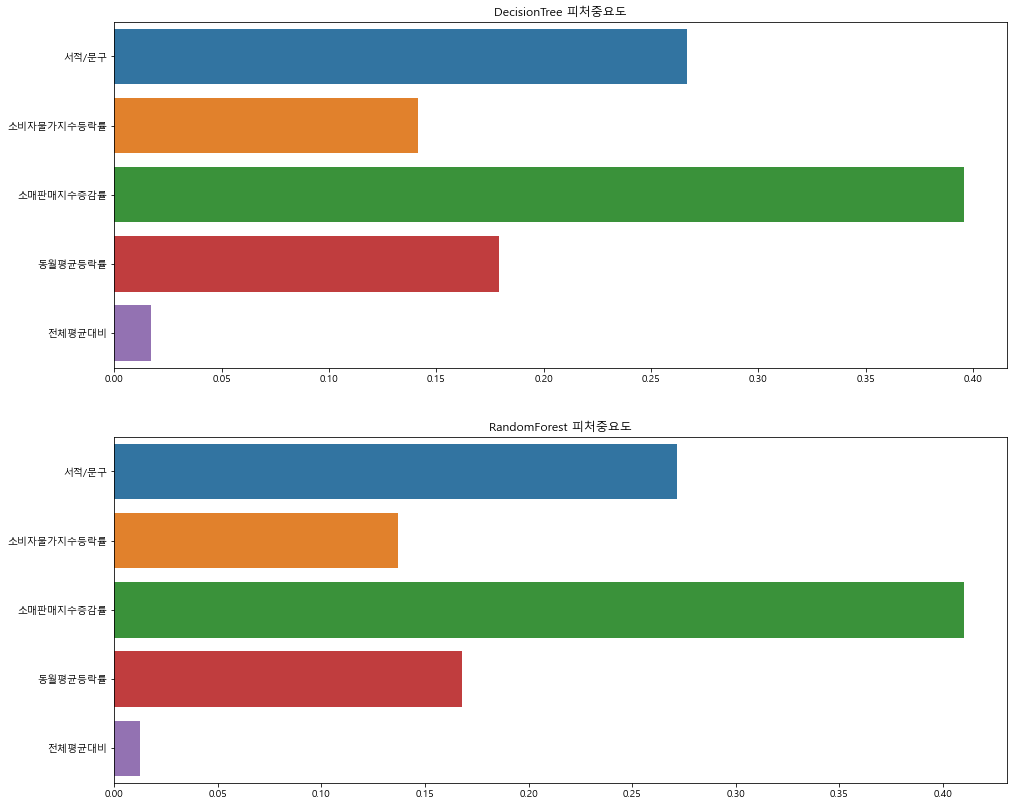

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(2, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

plt.show()

### GBM

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=11)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.8966
GBM 수행 시간: 0.1 초


In [95]:
# GBM GridSearchCV

parameters = {\
        'n_estimators':[100, 300, 500],\
        'learning_rate' : [0.025, 0.05, 0.1],
}

def best_rfparam(clf, param, cv_num, verbose_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num, verbose=verbose_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 GBMClassifier 정확도 : {0:.4f}'.format(accuracy))

best_rfparam(gb_clf, parameters, 2, 2)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............learning_rate=0.025, n_estimators=100; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=100; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=300; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=300; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=500; total time=   0.1s
[CV] END ..............learning_rate=0.025, n_estimators=500; total time=   0.1s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=300; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=300; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   0.1s
[CV] END ...............learning_rate=0.05, n_est

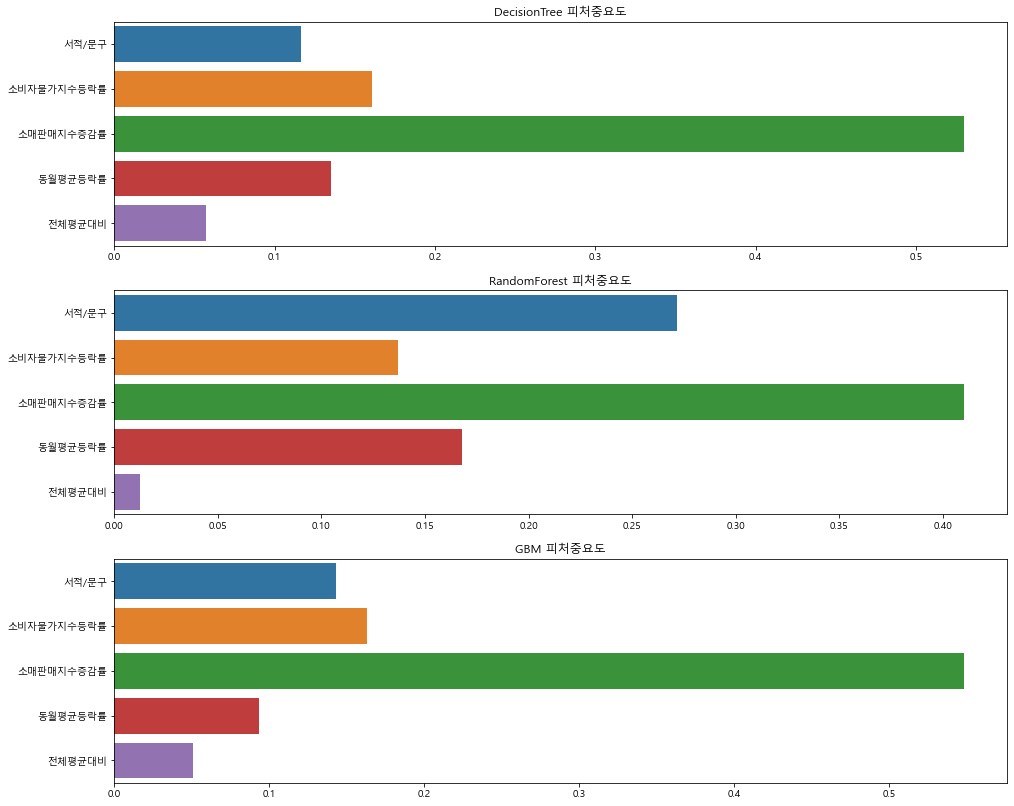

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(3, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")
sns.barplot(x=gb_clf.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

plt.show()

### XGBoost

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth':3,
        'eta':0.1,
        'objective':'binary:logistic',
        'eval_metric':'error',
        'early_stoppings':100
        }

num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[14:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.03361	test-error:0.06897
[1]	train-error:0.03361	test-error:0.06897
[2]	train-error:0.03361	test-error:0.06897
[3]	train-error:0.03361	test-error:0.06897
[4]	train-error:0.03361	test-error:0.10345
[5]	train-error:0.03361	test-error:0.17241
[6]	train-error:0.03361	test-error:0.17241
[7]	train-error:0.03361	test-error:0.10345
[8]	train-error:0.03361	test-error:0.10345
[9]	train-error:0.03361	test-error:0.10345
[10]	train-error:0.03361	test-error:0.06897
[11]	train-error:0.03361	test-error:0.06897
[12]	train-error:0.03361	test-error:0.06897
[13]	train-err

In [98]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괐값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괐값을 10개만 표시, 예측 확률값으로 표시됨
[0.997 0.948 0.997 0.891 0.951 0.996 0.997 0.075 0.019 0.09 ]
예측값 10개만 표시: [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [100]:
get_clf_eval(y_test, preds)

오차행렬:
 [[14  3]
 [ 0 12]]

정확도: 0.8966
정밀도: 0.8000
재현율: 1.0000
F1: 0.8889
AUC: 0.9118


In [101]:
# get_clf_eval(y_test, pred_probs)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

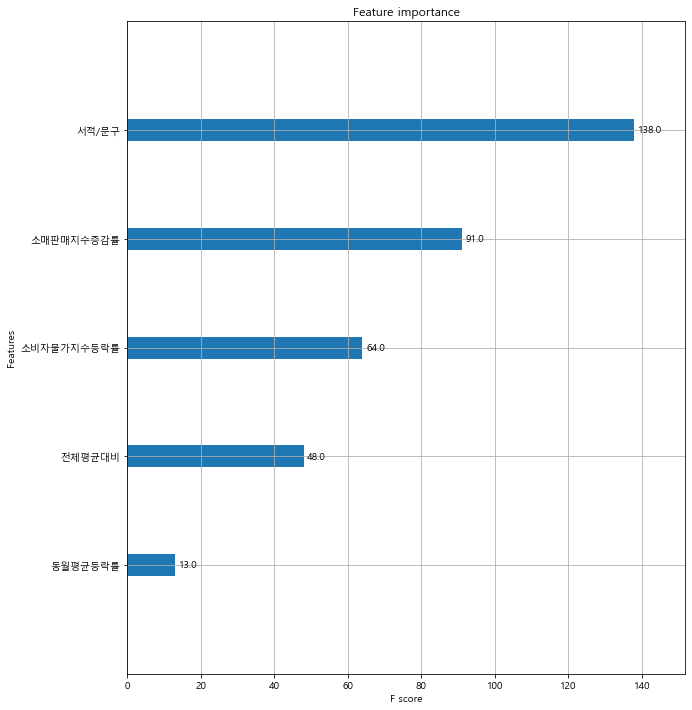

In [102]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### XGBClassifier

In [103]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict(X_test)

get_clf_eval(y_test, w_preds)

오차행렬:
 [[14  3]
 [ 0 12]]

정확도: 0.8966
정밀도: 0.8000
재현율: 1.0000
F1: 0.8889
AUC: 0.9118


In [104]:
get_clf_eval(y_test, w_pred_proba)

오차행렬:
 [[14  3]
 [ 0 12]]

정확도: 0.8966
정밀도: 0.8000
재현율: 1.0000
F1: 0.8889
AUC: 0.9118


In [48]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=1)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)

[0]	validation_0-logloss:0.63089
[1]	validation_0-logloss:0.58481
[2]	validation_0-logloss:0.54596
[3]	validation_0-logloss:0.51306
[4]	validation_0-logloss:0.48792
[5]	validation_0-logloss:0.46522
[6]	validation_0-logloss:0.44770
[7]	validation_0-logloss:0.42271
[8]	validation_0-logloss:0.41024
[9]	validation_0-logloss:0.39008
[10]	validation_0-logloss:0.38094
[11]	validation_0-logloss:0.35673
[12]	validation_0-logloss:0.35020
[13]	validation_0-logloss:0.32959
[14]	validation_0-logloss:0.31045
[15]	validation_0-logloss:0.30660
[16]	validation_0-logloss:0.29408
[17]	validation_0-logloss:0.28393
[18]	validation_0-logloss:0.28159
[19]	validation_0-logloss:0.27221
[20]	validation_0-logloss:0.26699
[21]	validation_0-logloss:0.26296
[22]	validation_0-logloss:0.26259
[23]	validation_0-logloss:0.25873
[24]	validation_0-logloss:0.25173
[25]	validation_0-logloss:0.25255
[26]	validation_0-logloss:0.24675
[27]	validation_0-logloss:0.24818
[28]	validation_0-logloss:0.24990
[29]	validation_0-loglos

In [50]:
get_clf_eval(y_test, ws100_preds)

오차행렬:
 [[14  3]
 [ 0 12]]

정확도: 0.8966
정밀도: 0.8000
재현율: 1.0000
F1: 0.8889
AUC: 0.9118


In [53]:
# get_clf_eval(y_test, ws100_pred_proba)

In [105]:
# XGBClassifier GridSearchCV

parameters = {\
        'max_depth':[3, 4, 5],\
        'min_child_weight' : [1, 3, 5],\
        'colsample_bytree' : [0.25, 0.5, 0.75]
}

def best_xgbcparam(clf, param, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 XGBClassifier 정확도 : {0:.4f}'.format(accuracy))
    
    xgb_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
    print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

best_xgbcparam(xgb_wrapper, parameters, 3)

GridSearchCV 최적 하이퍼 파라미터 : {'colsample_bytree': 0.75, 'max_depth': 3, 'min_child_weight': 1}
GridSearchCV 최고 정확도 :0.9498
테스트 세트에서의 XGBClassifier 정확도 : 0.8966
ROC AUC: 0.9755


In [106]:
xgb_wrapper = XGBClassifier(n_estimators=1000, random_state=11, learning_rate=0.02, max_depth=3, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_wrapper.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.96497	validation_1-auc:0.90931
[1]	validation_0-auc:0.96223	validation_1-auc:0.89461
[2]	validation_0-auc:0.98241	validation_1-auc:0.89461
[3]	validation_0-auc:0.98558	validation_1-auc:0.93382
[4]	validation_0-auc:0.99207	validation_1-auc:0.94118
[5]	validation_0-auc:0.99640	validation_1-auc:0.94608
[6]	validation_0-auc:0.99005	validation_1-auc:0.94118
[7]	validation_0-auc:0.99640	validation_1-auc:0.96078
[8]	validation_0-auc:0.99409	validation_1-auc:0.96569
[9]	validation_0-auc:0.99553	validation_1-auc:0.97059
[10]	validation_0-auc:0.99380	validation_1-auc:0.96569
[11]	validation_0-auc:0.99092	validation_1-auc:0.96078
[12]	validation_0-auc:0.99380	validation_1-auc:0.96078
[13]	validation_0-auc:0.99524	validation_1-auc:0.96078
[14]	validation_0-auc:0.99495	validation_1-auc:0.96569
[15]	validation_0-auc:0.99611	validation_1-auc:0.96569
[16]	validation_0-auc:0.99611	validation_1-auc:0.96078
[17]	validation_0-auc:0.99611	validation_1-auc:0.96078
[18]	validation_0-au

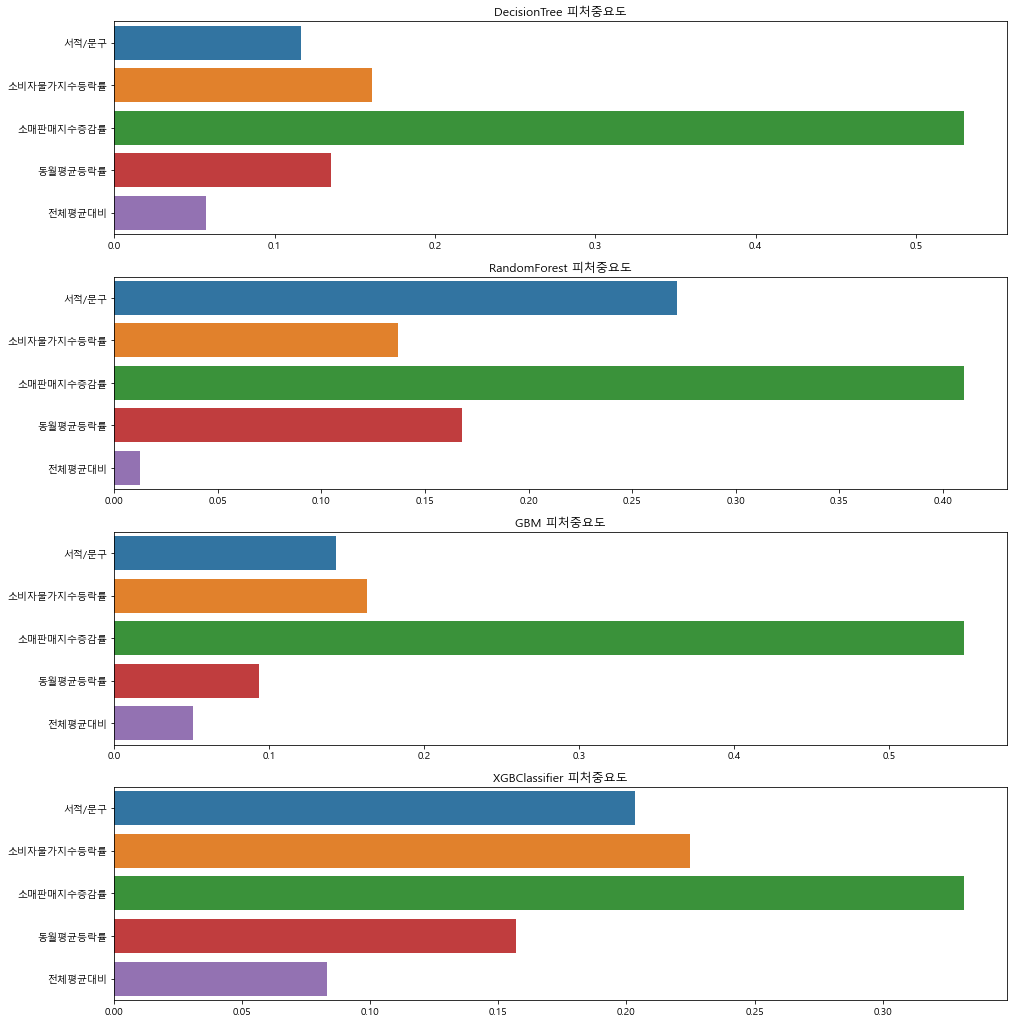

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((16, 18))

sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

sns.barplot(x=gb_clf.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

sns.barplot(x=xgb_wrapper.feature_importances_, y=data.columns, ax=axes[3,0])
axes[3,0].title.set_text("XGBClassifier 피처중요도")

plt.show()

## 평가

### 오차행렬
#### TN : 환자를 암이 아니라 예측했고 실제로도 암이 아님
#### FP : 환자를 암이 맞다고 예측했고 실제로는 암이 아님 -> 1종 오류
#### FN : 환자를 암이 아니라 예측했고 실제로는 암이 맞음 -> 2종 오류
#### TP : 환자를 암이 맞다고 예측했고 실제로도 암
이 맞음

In [108]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, rf1_pred)
print("오차행렬:\n", c_matrix)

오차행렬:
 [[14  3]
 [ 1 11]]


### 정밀도와 재현율
#### 정밀도 = TP / (FP + TP), 양성으로 판단한 것 중, 진짜 양성의 비율, FP를 낮추는데 초점
#### 재현율 = TP / (FN + TP), 진짜 양성인 것들 중, 올바르게 양성으로 판단한 비율, FN을 낮추는데 초점
#### 소비가 많은 월을 0이라 판단하게 되면 큰 영향이 발생하기 때문에 재현율이 더 중요하다.
#### 소비가 많이 없는 월을 1이라 판단하더라도 혜택이 있다면 소비가 늘어날 수도있기 때문에 정밀도<재현율

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
get_clf_eval(y_test, rf1_pred)

오차 행렬
[[14  3]
 [ 1 11]]
정확도: 0.8621, 정밀도: 0.7857, 재현율: 0.9167


### 정밀도/재현율 트레이드오프
#### 정밀도와 재현율 값이 똑같이 나왔기 때문에 더 중요한 재현율 값을 올려준다.

In [110]:
pred_proba = rf_clf1.predict_proba(X_test)
pred = rf_clf1.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: \n', pred_proba_result[:3])

pred_proba()결과 Shape : (29, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.03245323 0.96754677]
 [0.1669733  0.8330267 ]
 [0.07669685 0.92330315]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: 
 [[0.03245323 0.96754677 1.        ]
 [0.1669733  0.8330267  1.        ]
 [0.07669685 0.92330315 1.        ]]


In [111]:
from sklearn.preprocessing import Binarizer
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 오차행렬, 정확도, 정밀도, 재현율 함수
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[13  4]
 [ 0 12]]
정확도: 0.8621, 정밀도: 0.7500, 재현율: 1.0000
임곗값: 0.45
오차 행렬
[[13  4]
 [ 1 11]]
정확도: 0.8276, 정밀도: 0.7333, 재현율: 0.9167
임곗값: 0.5
오차 행렬
[[14  3]
 [ 1 11]]
정확도: 0.8621, 정밀도: 0.7857, 재현율: 0.9167
임곗값: 0.55
오차 행렬
[[15  2]
 [ 2 10]]
정확도: 0.8621, 정밀도: 0.8333, 재현율: 0.8333
임곗값: 0.6
오차 행렬
[[15  2]
 [ 2 10]]
정확도: 0.8621, 정밀도: 0.8333, 재현율: 0.8333


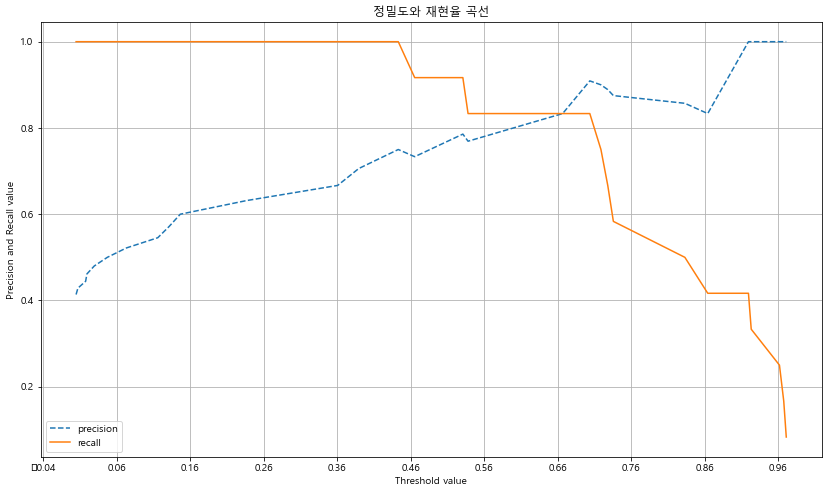

In [112]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, rf_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

### F1 스코어
#### 정밀도와 재현율 결합 지표

In [113]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, rf1_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.8462


In [114]:
# 오차행렬, 정확도, 정밀도, 재현율 함수에 F1스코어 추가
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.56, 0.6, 0.66, 0.7]
pred_proba = rf_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

# 임곗값이 0.5일 때 재현율이 정밀도 보다 높고 정확도와 F1 스코어 역시 좋은 수치
# 정확도: 0.8636, 정밀도: 0.8571, 재현율: 0.9231, F1:0.8889

임곗값: 0.56
오차행렬
[[15  2]
 [ 2 10]]
정확도: 0.8621, 정밀도: 0.8333, 재현율: 0.8333, F1:0.8333
임곗값: 0.6
오차행렬
[[15  2]
 [ 2 10]]
정확도: 0.8621, 정밀도: 0.8333, 재현율: 0.8333, F1:0.8333
임곗값: 0.66
오차행렬
[[15  2]
 [ 2 10]]
정확도: 0.8621, 정밀도: 0.8333, 재현율: 0.8333, F1:0.8333
임곗값: 0.7
오차행렬
[[16  1]
 [ 2 10]]
정확도: 0.8966, 정밀도: 0.9091, 재현율: 0.8333, F1:0.8696


### ROC 곡선과 AUC
#### 이진 분류 모델 예측 성능 판단 평가 지표
#### 민감도(TPR), 재현율: 실제값 positive가 정확히 예측돼야 하는 수준
#### 특이성(TNR): 실제값 negative가 정확히 예측돼야 하는 수준

In [115]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = rf_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1 2 3 4 5 6 7 8 9]
샘플 index로 추출한 임곗값:  [0.97 0.92 0.86 0.7  0.54 0.53 0.47 0.44 0.  ]
샘플 임곗값별 FPR:  [0.    0.    0.059 0.059 0.176 0.176 0.235 0.235 1.   ]
샘플 임곗값별 TPR:  [0.083 0.417 0.417 0.833 0.833 0.917 0.917 1.    1.   ]


In [116]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, rf1_pred, rf_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[14  3]
 [ 1 11]]
정확도: 0.8621, 정밀도: 0.7857, 재현율: 0.9167, F1:0.8462, AUC:0.9412


### 최적 임곗값 적용

In [117]:
binarizer = Binarizer(threshold=0.7)

pred_th_06 = binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, rf_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[16  1]
 [ 2 10]]
정확도: 0.8966, 정밀도: 0.9091, 재현율: 0.8333, F1:0.8696, AUC:0.9412


#### ROC 곡선 시각화

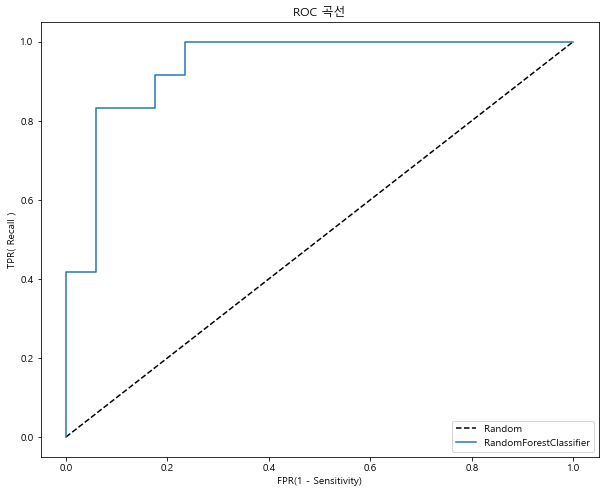

In [118]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="RandomForestClassifier")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import roc_auc_score

pred_proba = rf_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9412


In [120]:
from sklearn.tree import export_graphviz
from sklearn import tree

feature_names = ["서적/문구", "소비자물가지수등락률", "소매판매지수증감률","동월평균등락률","전체평균대비"]
target_names = ["0", "1"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
export_graphviz(dt_clf, 
                out_file="서적_rf.dot",
                class_names=target_names, 
                feature_names=feature_names, 
                impurity=True, 
                filled=True, 
                rounded=True
                )

<Figure size 1152x720 with 0 Axes>

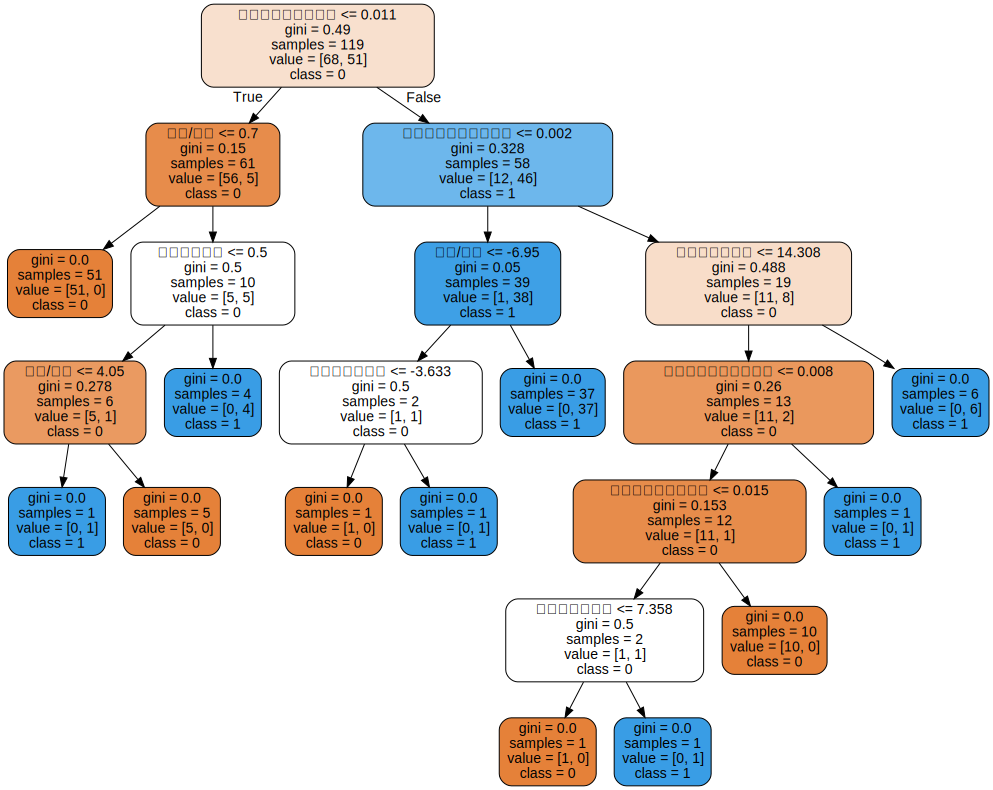

In [72]:
import graphviz

with open("서적_rf.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 랜덤 포레스트 시각화

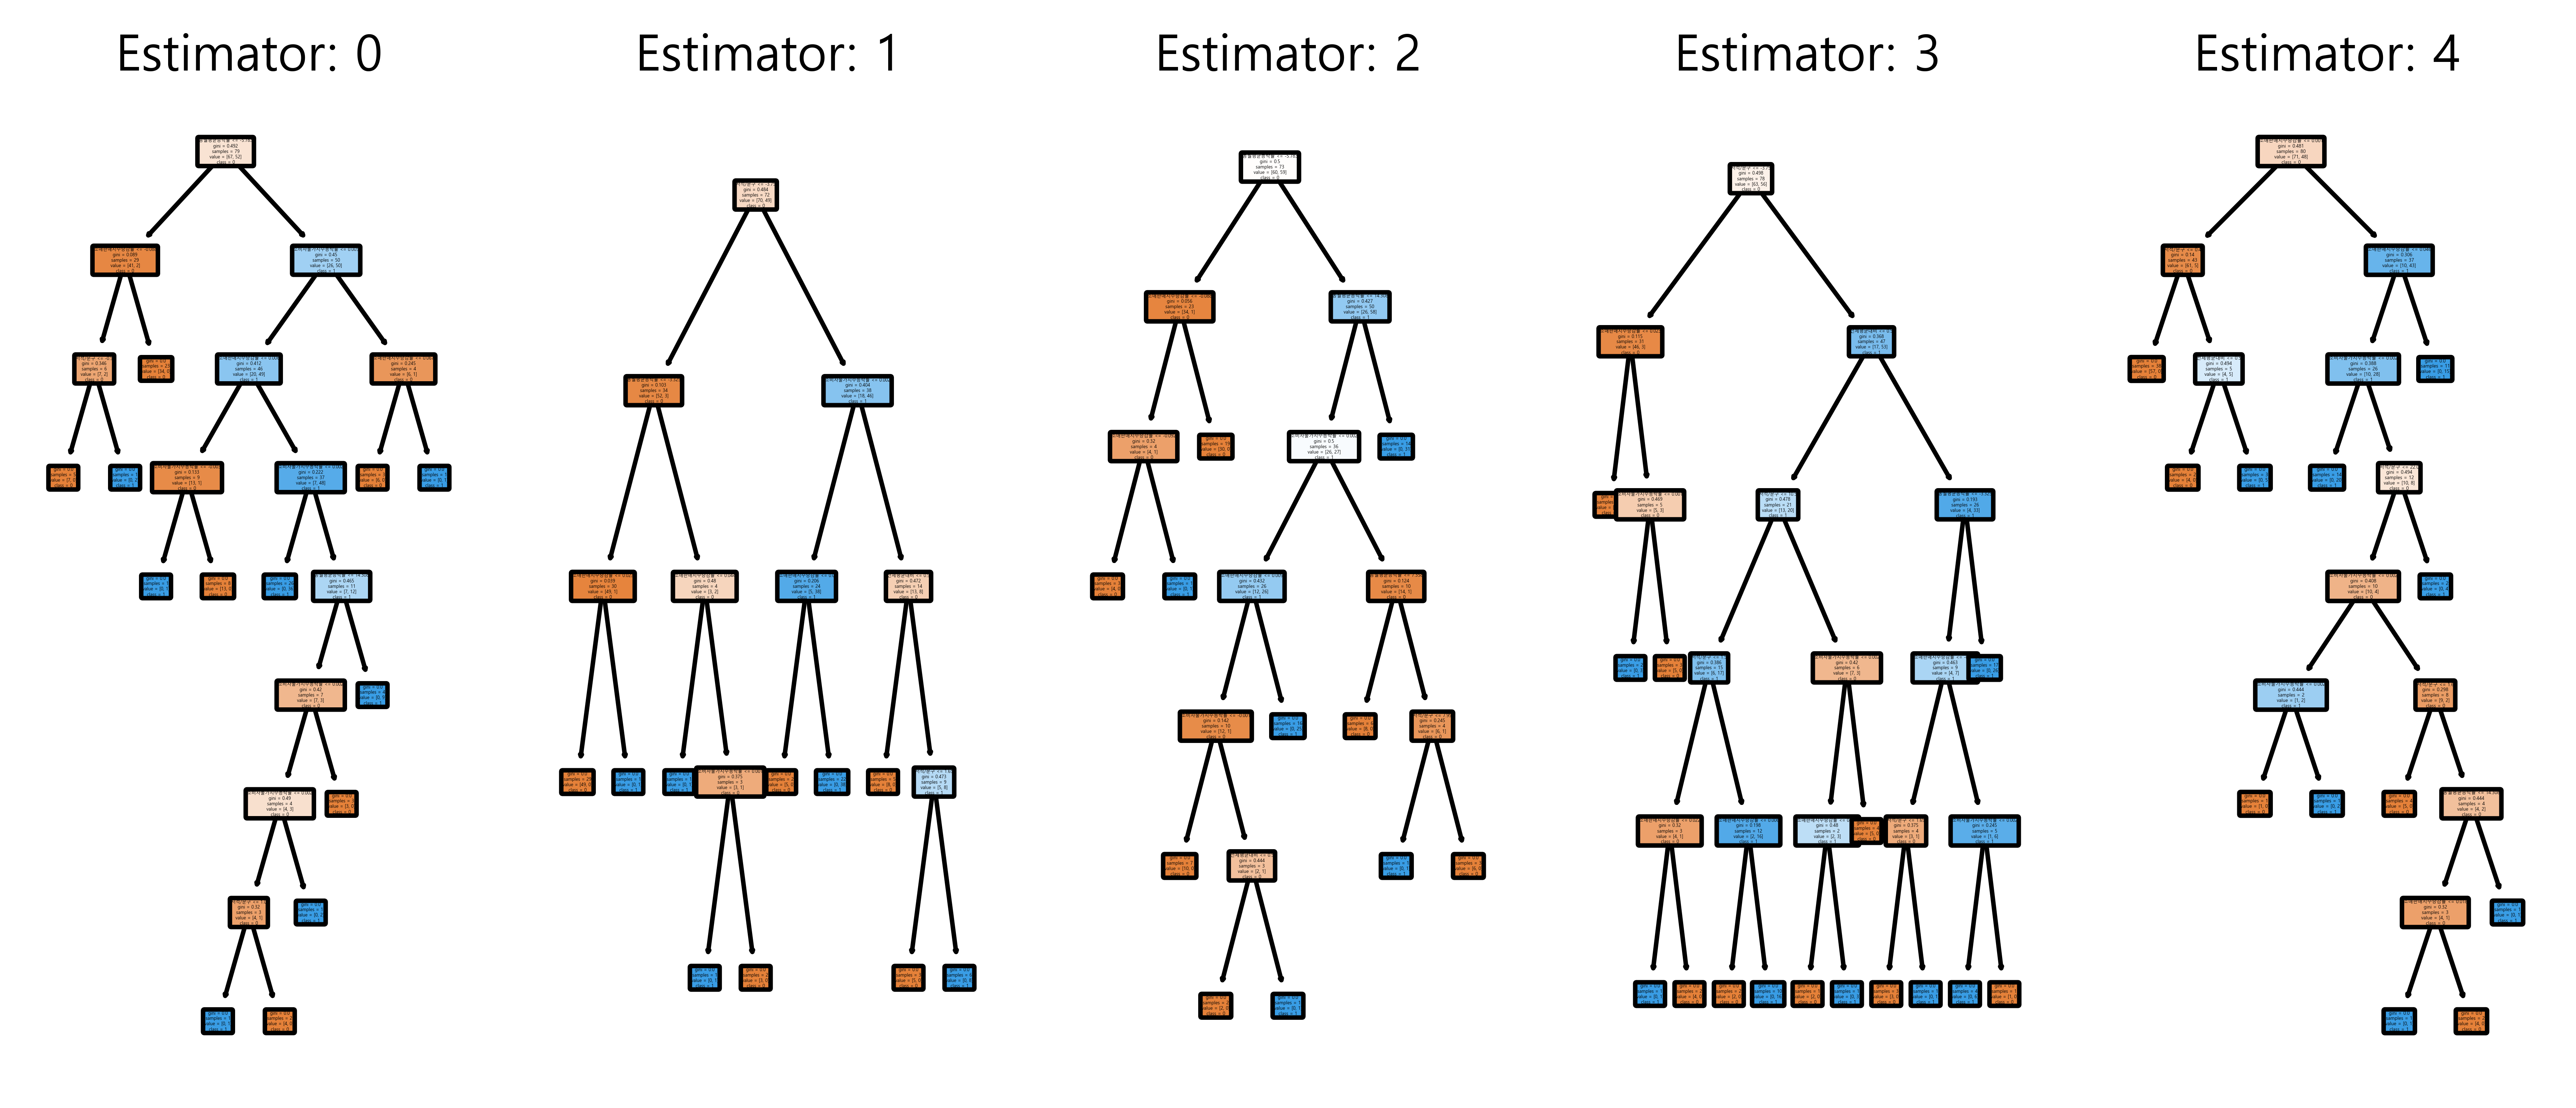

In [73]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 4), dpi=900)

for index in range(0, 5):
    tree.plot_tree(rf_clf.estimators_[index],
                   feature_names = feature_names, 
                   class_names=target_names,
                   impurity=True,
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_clf1_5trees.png')